In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
from HAC_DATA import get_human_dataset
warnings.filterwarnings('ignore')

# 사용자 행동 데이터
X_train, X_test, y_train, y_test = get_human_dataset()

In [3]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print('Random Forest Accuracy: {:.4f}'.format(accuracy))

Random Forest Accuracy: 0.9253


=> 결정나무에서 그리드 서치로 하이퍼 파라미터를 튜닝했던 것보다 더 높은 정확도, 더 짧은 학습 시간

In [4]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100],
    'max_depth': [6, 8, 10, 12],
    'min_samples_leaf': [8, 12, 18],
    'min_samples_split': [8, 16, 20]
}

grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('Best Parameter:\n', grid_cv.best_params_)
print('Best Accuracy:\n', grid_cv.best_score_)

Best Parameter:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
Best Accuracy:
 0.9179815016322089


In [6]:
rf_clf_300 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, min_samples_split=8, random_state=0)
rf_clf_300.fit(X_train, y_train)
pred = rf_clf_300.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print(f'Accuracy : {accuracy:.4f}')

Accuracy : 0.9165


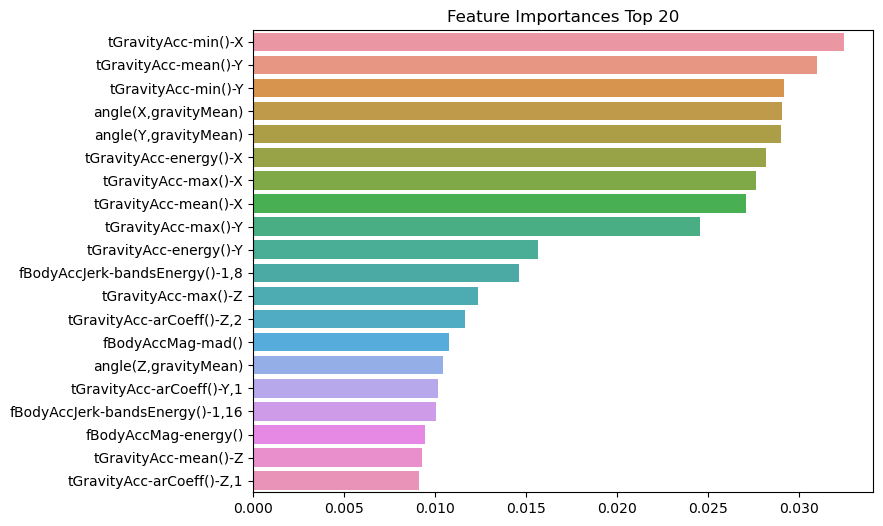

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf_300.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title('Feature Importances Top 20')
sns.barplot(x=ftr_top20.values, y=ftr_top20.index)
plt.show()